Let's import all necesserary libraries for further:

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
None

2024-02-22 01:24:19.463074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 01:24:19.463213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 01:24:19.515721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 01:24:19.608649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-22 01:24:20.806981: W tensorflow/compiler/tf2

Let's define out Classificator:

In [3]:
class Classificator:
    def __init__(self):
        self.numbers = np.zeros((10, 28, 28))

    def fit(self, images, labels):
        for i in range(0, len(images)):
            self.numbers[labels[i]] += imag]]es[i]
    def predict(self, images):
        results = []
        for i in range(0, len(images)):
            result = []
            for j in range(0, 10):
                temp_image = np.multiply(images[i], self.numbers[j])
                temp_result = np.sum(temp_image, axis=None)
                result.append(temp_result)
            results.append(np.argmax(result))
        return results

Let's downoload MNIST data:

In [4]:
(data_train, labels_train), (data_test, labels_test) = tf.keras.datasets.mnist.load_data()
images = np.concatenate((data_train, data_test))
labels = np.concatenate((labels_train, labels_test))

Let's create our model and test it:

In [5]:
model = Classificator()
print("Accuracy score, when training data is 80% of all data:")
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
model.fit(images_train, labels_train)
print(f'{accuracy_score(model.predict(images_test), labels_test):.2f}')

Accuracy score, when training data is 80% of all data:
0.68


Let's check, how our model will predict values with different amount of training data:

In [6]:
accuracies = dict()
for i in range(1, 9):
    print(f"Accuracy score, when training data is {i * 10}% of all data")
    test_size = 1 - i / 10
    images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=test_size,
                                                                            random_state=42)
    temp_model = Classificator()
    temp_model.fit(images_train, labels_train)
    accuracies[test_size] = accuracy_score(temp_model.predict(images_test), labels_test)
    print(f'{accuracies[test_size]:.2f}')

Accuracy score, when training data is 10% of all data
0.66
Accuracy score, when training data is 20% of all data
0.68
Accuracy score, when training data is 30% of all data
0.68
Accuracy score, when training data is 40% of all data
0.67
Accuracy score, when training data is 50% of all data
0.67
Accuracy score, when training data is 60% of all data
0.67
Accuracy score, when training data is 70% of all data
0.68
Accuracy score, when training data is 80% of all data
0.68


Let's make a plot of accuracies:

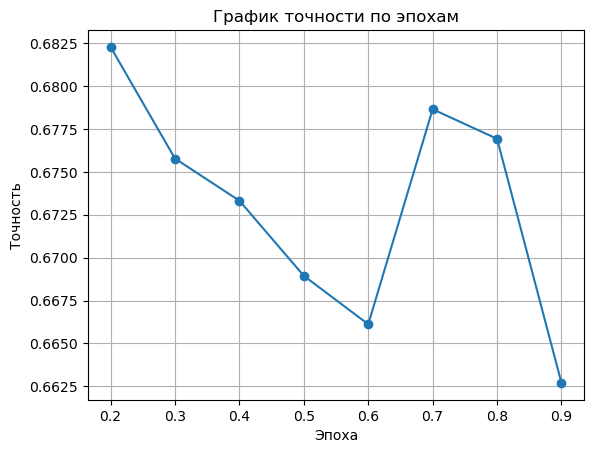

In [7]:
epochs = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.plot(epochs, accuracy_values, marker='o', linestyle='-')
plt.title('График точности по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)
plt.show()